## Prediction on iris dataset

## Import Dataset

In [48]:
import numpy as np 
import pandas as pd
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
%matplotlib inline
from sklearn.svm import LinearSVC
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [49]:
Df = pd.read_csv("iris.csv")

## Run Dataset

In [50]:
Df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Check Shape of the Data

In [51]:
Df.shape

(150, 5)

## Check Data Validation

In [52]:
Df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Data Visualization

<AxesSubplot:xlabel='sepal_length', ylabel='count'>

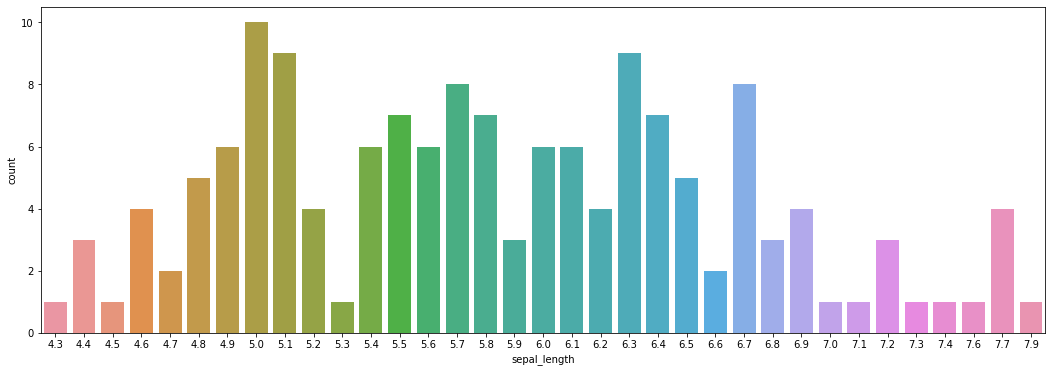

In [53]:
#Create a countplot on 'sepal_length' column of Df dataframe.
plt.figure(figsize = (18, 6))
sns.countplot(Df['sepal_length'])

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

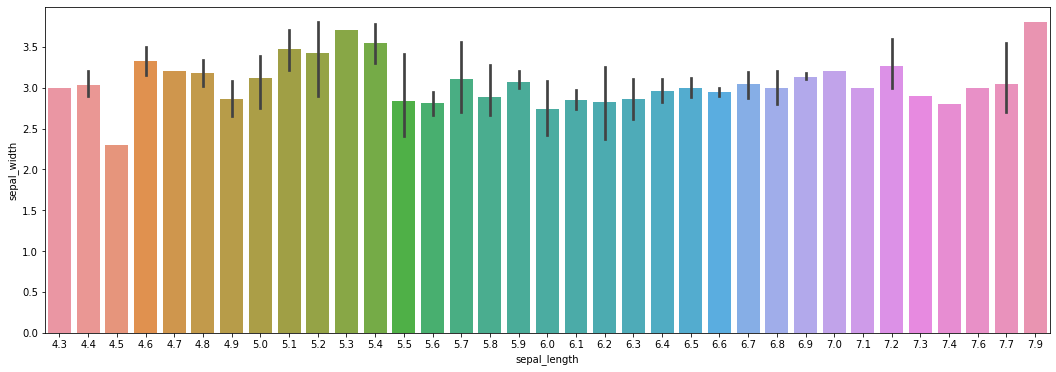

In [54]:
#Create a barplot on 'sepal_length' column of Df datgaframe.
plt.figure(figsize = (18, 6))
sns.barplot(Df['sepal_length'], Df['sepal_width'])

<AxesSubplot:xlabel='petal_length'>

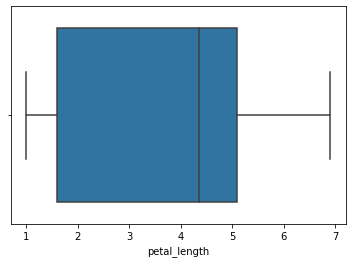

In [55]:
#Create a boxplot on 'petal_length' column of Df dataframe.
sns.boxplot(Df['petal_length'])

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

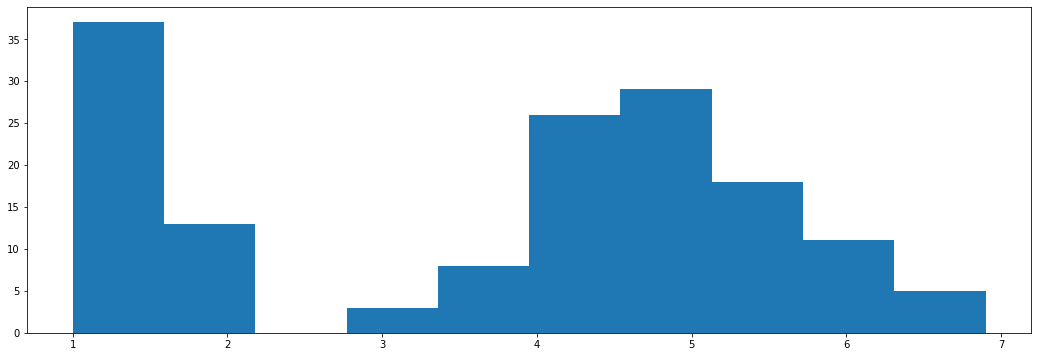

In [56]:
plt.figure(figsize = (18, 6))
plt.hist(Df['petal_length'])

<AxesSubplot:xlabel='petal_width'>

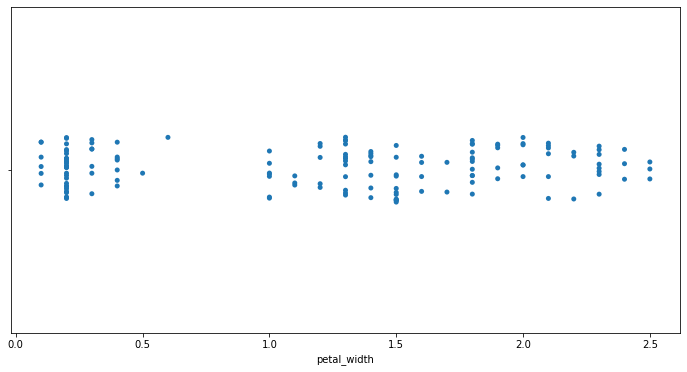

In [57]:
#Create a Stripplot on 'petal_width' column of Df dataframe.
plt.figure(figsize = (12, 6))
sns.stripplot(Df['petal_width'])

## Create A Dependent And Independent Variable

In [58]:
X = Df.drop(['species'],axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
y = Df['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

## Split Into Training And Testing

In [60]:
#Train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


## Train at least 4 models

In [61]:
#Decision Tree Classifier.
dt_clf=DecisionTreeClassifier(random_state=25)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=25)

In [62]:
dt_pred = dt_clf.predict(X_test)

In [63]:
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
Decision_Tree_Accuracy = round(accuracy_score(y_test, dt_pred)*100)
Decision_Tree_Accuracy

[[ 9  0  0]
 [ 0 12  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.92      0.96        13
   virginica       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



97

In [65]:
#Logistic regression.
lr_model = LogisticRegression(random_state=25)

In [66]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=25)

In [67]:
pred = lr_model.predict(X_test)

In [68]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
Logistic_regression_Accuracy = round(accuracy_score(y_test, pred)*100)
print(Logistic_regression_Accuracy)

[[ 9  0  0]
 [ 0 12  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.92      0.96        13
   virginica       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

97


In [69]:
from sklearn.neighbors import KNeighborsClassifier
knnr = KNeighborsClassifier() 
knnr.fit(X_train,y_train)
pred=knnr.predict(X_test)

In [70]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
KNN_Accuracy = round(accuracy_score(y_test, pred)*100)
print(KNN_Accuracy)

[[ 9  0  0]
 [ 0 11  2]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.85      0.92        13
   virginica       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30

93


In [71]:
 clf = RandomForestClassifier(max_depth=2, random_state=0)

In [72]:
clf.fit(X_train, y_train)
RandomForestClassifier(...)
pred = clf.predict(X_test)
pred

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'setosa'], dtype=object)

In [73]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
Random_Forest_Accuracy = round(accuracy_score(y_test, pred)*100)
print(Random_Forest_Accuracy)

[[ 9  0  0]
 [ 0 12  1]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.92      0.92      0.92        13
   virginica       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

93


## Create a dataframe from all model's accuracy and then show it on bar chart.

In [74]:
data = {'Decision Tree Classifier': [Decision_Tree_Accuracy],
        'Logistic Regression': [Logistic_regression_Accuracy],
        'KNN': [KNN_Accuracy],
        'Random Forest Classifier': [Random_Forest_Accuracy]
        }

df = pd.DataFrame(data)
df

,Decision Tree Classifier,Logistic Regression,KNN,Random Forest Classifier
0,97,97,93,93


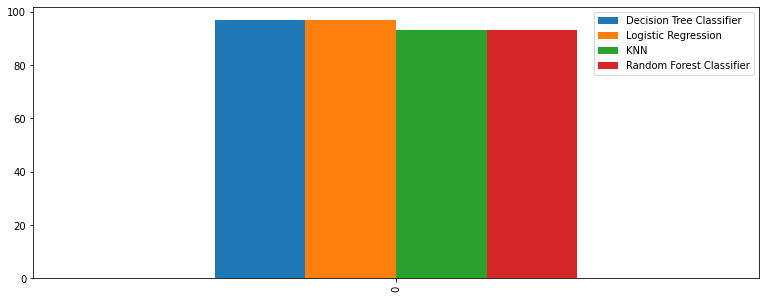

In [75]:
#Bar chart on the above dataframe.
df.plot.bar(figsize = (13, 5))
plt.show()

End Project